In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [2]:
tf.__version__

'2.12.0'

In [3]:
# Connect the notebook on Google Colab to my personal Drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# 1. DATA LOADING

In [4]:
# Read CSV related to train data and create train DataFrame
train_file_path = '/content/drive/My Drive/Colab Notebooks/titanic/train.csv'
train_df = pd.read_csv(train_file_path)

# Read CSV related to test data and create test DataFrame
test_file_path = '/content/drive/My Drive/Colab Notebooks/titanic/test.csv'
test_df = pd.read_csv(test_file_path)

In [5]:
# Small preview of train data, we are going to use this data to train our model
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Small preview of test data, we are going to use this data to test our model, note that the 'Survived' column is missing, so the goal is to predict this target using
# logistic regression
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# Show the number of rows and columns in our train dataframe
train_df.shape

(891, 12)

In [8]:
# Show the number of rows and columns in our test dataframe
test_df.shape

(418, 11)

# 2. DATA CLEANING



In [9]:
# From the previous preview we could see that the train dataframe contains missing values, let's count all the missing values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 2.1 AGE - MISSING VALUES

In [10]:
# AGE - MISSING VALUES
# Let's calculate the percentage of missing values in 'Age' column
percentage_missing_age = (train_df['Age'].isnull().sum()/train_df.shape[0])*100
print(f"Percentage of missing values in Age column: {percentage_missing_age:.4f}")

Percentage of missing values in Age column: 19.8653


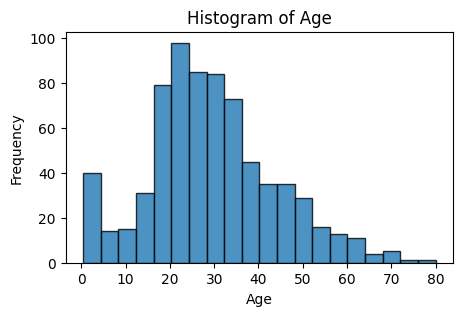

In [11]:
# In order to understand the best way to fill the missing values in 'Age' columns, let's plot an histogram to check the values distribution
# Define figure size
plt.figure(figsize=(5,3))
# Define the histogram
plt.hist(train_df['Age'], bins=20, edgecolor='black', alpha=0.8)
# Define axis labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
# Plot the histogram
plt.show()

In [12]:
# From the histogram we can clearly see that the distribution is concentrated from the age ~15 to ~40 (right skewed), so using the mean could give us biased results,
# to deal with this we are going to use the median to fill the missing values
median_age = train_df['Age'].median()
train_df['Age'].fillna(value = median_age, inplace = True)

## 2.2 CABIN - MISSING VALUES

In [13]:
# CABIN - MISSING VALUES
# Let's calculate the percentage of missing values for the 'Cabin' column
percentage_missing_cabin = (train_df['Cabin'].isnull().sum()/train_df.shape[0])*100
print(f"Percentage of missing values in Cabin column: {percentage_missing_cabin:.4f}")

Percentage of missing values in Cabin column: 77.1044


In [14]:
# The most of the values in Cabin column are missing, so we are going to ignore this column for our model
train_df.drop('Cabin', axis=1, inplace=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## 2.3 EMBARKED - MISSING VALUES

In [15]:
# EMBARK - MISSING VALUES
# Calculate the percentage of missing values for the 'Embark' column
percentage_missing_embarked = (train_df['Embarked'].isnull().sum()/train_df.shape[0])*100
print(f"Percentage of missing values in Embark column: {percentage_missing_embarked:.4f}")

Percentage of missing values in Embark column: 0.2245


In [16]:
# Only two missing values in 'Embarked' column, so we can assume that all the people have boarded, let's fill the 'Embarked' missing values with the most frequent one
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

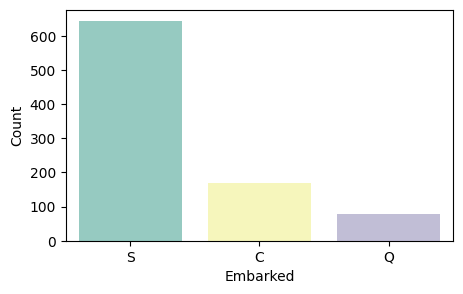

In [17]:
# Plot a count chart showing the number of values for each 'Embarked' value
plt.figure(figsize = (5, 3))
sns.countplot(x='Embarked', data=train_df, palette='Set3')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

In [18]:
# From the count plot we can clearly see that the 'S' value is the most frequent one, let's fill the missing values with 'S'
# Fill the missing values with the most frequent value of 'Embarked' column
most_frequent_embarked_cat = train_df['Embarked'].value_counts().idxmax()
train_df['Embarked'].fillna(value = most_frequent_embarked_cat, inplace = True)

In [19]:
# Check if the missing values have been properly filled
train_df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

## 2.4 DATA ASSESSMENT

In [20]:
# According to the data dictionary, the columns 'SibSp' and 'Parch' are related to travel with or without family, in order to avoid linearity between the two columns, we are
# going to create a unique column called 'TravellingAlone'
train_df['TravellingAlone'] = np.where(train_df['SibSp'] + train_df['Parch'] > 0, 0, 1)
train_df.drop('SibSp', axis=1, inplace=True)
train_df.drop('Parch', axis=1, inplace=True)

In [21]:
# Now let's define the train data, dropping some columns and categorizing others
train_data = train_df.copy()
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravellingAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


In [22]:
# For this analysis we are going to drop the 'PassengerId', 'Name' and 'Ticket' columns, since they are not relevant for our analysis
train_data.drop('PassengerId', axis=1, inplace=True)
train_data.drop('Name', axis=1, inplace=True)
train_data.drop('Ticket', axis=1, inplace=True)

In [23]:
# In order to use the 'Pclass', 'Embarked' and 'Sex' columns as features of our model, we have to convert them into categorical variables
training = pd.get_dummies(train_data, columns=['Pclass', 'Embarked', 'Sex'])
train_data = training
train_data.head()

,Survived,Age,Fare,TravellingAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,0,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,1,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,0,1


In [24]:
train_data.isnull().sum()

Survived           0
Age                0
Fare               0
TravellingAlone    0
Pclass_1           0
Pclass_2           0
Pclass_3           0
Embarked_C         0
Embarked_Q         0
Embarked_S         0
Sex_female         0
Sex_male           0
dtype: int64

### Now we are going to apply the same operations on the **test dataframe**:


*   Fill the missing values of 'Age' column with its median
*   Drop the 'Cabin' column
*   Fill the missing values of 'Embarked' with the most frequent value
*   Drop the 'PassengerId', 'Name' and 'Ticket' columns
*   Add the column 'IsAlone'



In [25]:
# Apply the same operations on test dataframe
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

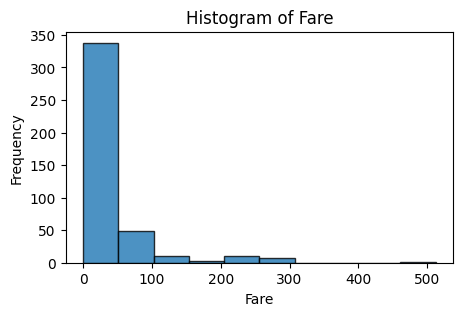

In [26]:
# In the test dataframe we have one missing value in the 'Fare' column, let's take a look at it
plt.figure(figsize=(5, 3))
plt.hist(test_df['Fare'], bins=10, edgecolor='black', alpha=0.8)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram of Fare')
plt.show()

In [27]:
# Since the 'Fare' histogram is right skewed, let's fill the one missing value with the median
median_fare = test_df['Fare'].median()
test_df['Fare'].fillna(median_fare, inplace=True)

In [28]:
# Create the 'TravellingAlone' column in test dataframe
test_df['TravellingAlone'] = np.where(test_df['SibSp'] + test_df['Parch'] > 0, 0, 1)
test_df.drop('SibSp', axis=1, inplace=True)
test_df.drop('Parch', axis=1, inplace=True)

In [29]:
# Now let's apply the same changes as the train dataframe
test_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravellingAlone
0,892,3,"Kelly, Mr. James",male,34.5,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,S,0


In [30]:
test_data = train_df.copy()

test_data.drop('PassengerId', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace=True)
test_data.drop('Ticket', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=['Pclass', 'Embarked', 'Sex'])
test_data = testing

test_data.head()

,Survived,Age,Fare,TravellingAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,0,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,1,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,0,1


In [31]:
test_data.isnull().sum()

Survived           0
Age                0
Fare               0
TravellingAlone    0
Pclass_1           0
Pclass_2           0
Pclass_3           0
Embarked_C         0
Embarked_Q         0
Embarked_S         0
Sex_female         0
Sex_male           0
dtype: int64

# 3. DATA EXPLORATION
## 3.1 Passenger Class

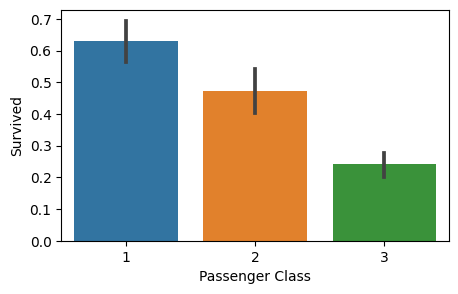

In [32]:
# Let's explore the 'Pclass' (Passenger Class: 1, 2, 3)
plt.figure(figsize=(5, 3))
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.xlabel('Passenger Class')
plt.ylabel('Survived')
plt.show()

From the barplot we can see that being a first class passenger is the safest

## 3.2 Embarked Port

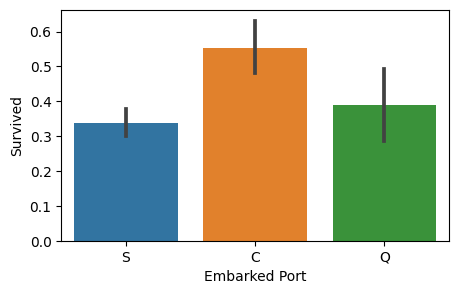

In [33]:
# Let's explore the 'Embark' column (S -> Southhampton, C -> Cherbourg, Q -> Queenstown)
plt.figure(figsize=(5, 3))
sns.barplot(x='Embarked', y='Survived', data=train_df)
plt.xlabel('Embarked Port')
plt.ylabel('Survived')
plt.show()

From the bar plot we can see that the people boarded in Cherbourg are more likely to survive, probably because of the passenger class or the room assignment

## 3.3 TravellingAlone

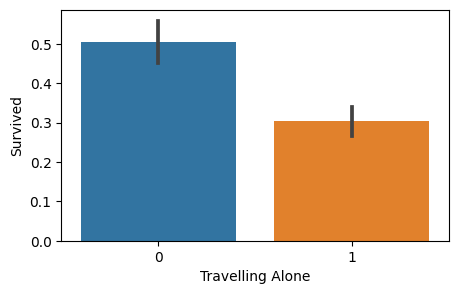

In [34]:
# Let's explore the 'IsAlone' column (1 = alone, 0 = not alone)
plt.figure(figsize=(5, 3))
sns.barplot(x='TravellingAlone', y='Survived', data=train_df)
plt.xlabel('Travelling Alone')
plt.ylabel('Survived')
plt.show()

## 3.4 Sex

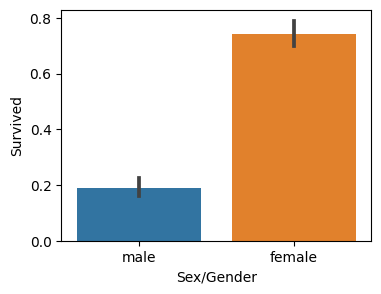

In [35]:
# Let's explore the 'Sex' column (male, female)
plt.figure(figsize=(4, 3))
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.xlabel('Sex/Gender')
plt.ylabel('Survived')
plt.show()

From the barplot we can clearly see that being female increases a lot the chanche to survive

## 3.5 Age

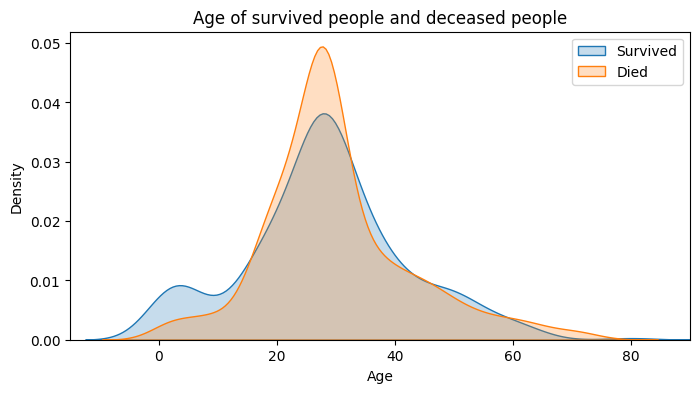

In [36]:
# Since the age is a numerical value, let's compare the age of survived people with the age of deceased people
plt.figure(figsize=(8,4))

survived_data = train_data['Age'].where(train_data['Survived'] == 1).dropna()
not_survived_data = train_data['Age'].where(train_data['Survived'] == 0).dropna()

sns.kdeplot(survived_data, fill=True)
sns.kdeplot(not_survived_data, fill=True)

plt.legend(['Survived', 'Died'])
plt.title('Age of survived people and deceased people')
plt.xlabel('Age')
plt.xlim(-15,90)
plt.show()

The age of survived people is very similar to the age of deceased people, an interesting thing that we can see is that among the survived people a big portion were children. So, considering the survival rate of passengers under the age of 16, we are going to add another column called 'Minor' based on the age number

In [37]:
# Add 'IsMinor' column to train dataframe and test dataframe
train_data['IsMinor'] = np.where(train_data['Age'] <= 16, 1, 0)
test_data['IsMinor'] = np.where(test_data['Age'] <= 16, 1, 0)

## 3.6 Fare

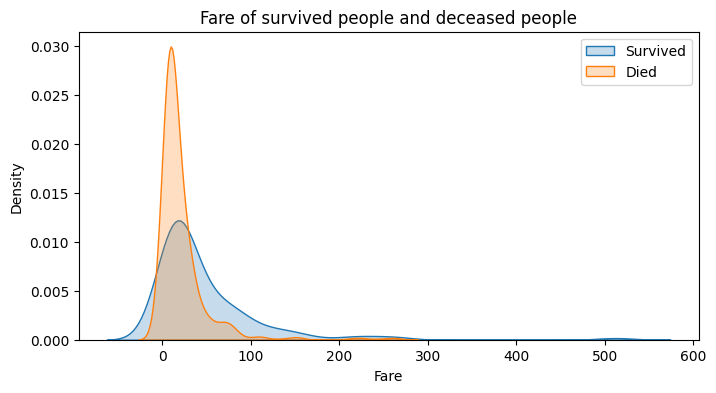

In [38]:
# Since the 'Fare' column is a real number, let's compare the fare value of survived people with the one of deceased people
plt.figure(figsize=(8,4))

survived_data = train_data['Fare'].where(train_data['Survived'] == 1).dropna()
not_survived_data = train_data['Fare'].where(train_data['Survived'] == 0).dropna()

sns.kdeplot(survived_data, fill=True)
sns.kdeplot(not_survived_data, fill=True)

plt.legend(['Survived', 'Died'])
plt.title('Fare of survived people and deceased people')
plt.xlabel('Fare')
plt.show()

From the chart we can see that the distributions are quite different, this is going to be an important predictor for our model, furthermore, we can see that passengers that paid a low fare are less likely to survive, while passenger that paid an high fare are more likely to survive, this also might be related to the passenger class

# 4. LOGISTIC REGRESSION

In [68]:
# Import of Scikit-learn metrics for our Logistic Regression model
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_score

In [69]:
# Preview of the data
train_data.head()

,Survived,Age,Fare,TravellingAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,IsMinor
0,0,22.0,7.2500,0,0,0,1,0,0,1,0,1,0
1,1,38.0,71.2833,0,1,0,0,1,0,0,1,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,1,0,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,1,0,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,0,1,0


## 4.1 Definition of the features
Thanks to the data exploration we saw that our output variable 'Survived' is correlated to some input variables, such as 'Age', 'Fare', 'TravellingAlone', 'Pclass', 'Embarked', 'Sex', 'IsMinor', so we are going to consider these input variables as features for our model

In [82]:
# Definition of the features
features = ['Age', 'Fare', 'TravellingAlone', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male', 'Sex_female', 'IsMinor']

x_train = train_data[features]
y_train = train_data['Survived']

# Set the seed to 42 to make the output deterministic
tf.random.set_seed(42)

## 4.2 Definition of the models
For this project we are going to use three different types of models:


1.   Basic model with only one layer
2.   Model with Dense layers
3.   Model with Dropout and Batch Normalization



In [91]:
# Model with one layer
basic_model = tf.keras.Sequential(
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(x_train.shape[1],))
)

# Model with Dense layers
dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Model with Dropout and Batch Normalization
norm_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

## 4.3 Caching the dataset

In [92]:
# Caching the train dataset
batch_size = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.cache()  # Cache the dataset in memory or on disk
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(batch_size)

## 4.4 Compile the models with optimizer, loss-function, and metrics

In [93]:
# Compile of the models, we are going to consider 'adam' as optimizer, 'binary_crossentropy' as loss-function, and calculate the 'accuracy' metrics,
# finally calculate the roc_auc score, confusion matrix, and precision metrics
basic_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dense_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
norm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## 4.5 Training of the models
### Training of the basic model with only one layer



In [94]:
# Train the basic model
history_basic_model = basic_model.fit(train_dataset, epochs=500)

Epoch 1/500
28/28 [==============================] - 2s 6ms/step - loss: 10.4562 - accuracy: 0.3367
Epoch 2/500
28/28 [==============================] - 0s 5ms/step - loss: 9.9628 - accuracy: 0.3378
Epoch 3/500
28/28 [==============================] - 0s 6ms/step - loss: 9.4658 - accuracy: 0.3356
Epoch 4/500
28/28 [==============================] - 0s 4ms/step - loss: 8.9794 - accuracy: 0.3356
Epoch 5/500
28/28 [==============================] - 0s 5ms/step - loss: 8.4877 - accuracy: 0.3345
Epoch 6/500
28/28 [==============================] - 0s 5ms/step - loss: 7.9954 - accuracy: 0.3345
Epoch 7/500
28/28 [==============================] - 0s 5ms/step - loss: 7.5020 - accuracy: 0.3311
Epoch 8/500
28/28 [==============================] - 0s 4ms/step - loss: 7.0175 - accuracy: 0.3300
Epoch 9/500
28/28 [==============================] - 0s 4ms/step - loss: 6.5297 - accuracy: 0.3322
Epoch 10/500
28/28 [==============================] - 0s 3ms/step - loss: 6.0420 - accuracy: 0.3311
Epoch 11

### Training of the model with dense layers

In [95]:
# Train the model with dense layers
history_dense_model = dense_model.fit(train_dataset, epochs=500)

Epoch 1/500
28/28 [==============================] - 3s 8ms/step - loss: 0.7592 - accuracy: 0.6622
Epoch 2/500
28/28 [==============================] - 0s 5ms/step - loss: 0.6481 - accuracy: 0.6756
Epoch 3/500
28/28 [==============================] - 0s 6ms/step - loss: 0.5847 - accuracy: 0.7082
Epoch 4/500
28/28 [==============================] - 0s 5ms/step - loss: 0.5583 - accuracy: 0.7273
Epoch 5/500
28/28 [==============================] - 0s 6ms/step - loss: 0.5376 - accuracy: 0.7284
Epoch 6/500
28/28 [==============================] - 0s 6ms/step - loss: 0.5370 - accuracy: 0.7475
Epoch 7/500
28/28 [==============================] - 0s 5ms/step - loss: 0.5435 - accuracy: 0.7542
Epoch 8/500
28/28 [==============================] - 0s 6ms/step - loss: 0.4944 - accuracy: 0.7823
Epoch 9/500
28/28 [==============================] - 0s 6ms/step - loss: 0.4892 - accuracy: 0.7879
Epoch 10/500
28/28 [==============================] - 0s 4ms/step - loss: 0.4892 - accuracy: 0.7991
Epoch 11/

### Training of model with batch normalization and dropout

In [96]:
# Train model with batch normalization and dropout
history_norm_model = norm_model.fit(train_dataset, epochs=500)

Epoch 1/500
28/28 [==============================] - 2s 4ms/step - loss: 0.7913 - accuracy: 0.5499
Epoch 2/500
28/28 [==============================] - 0s 4ms/step - loss: 0.7371 - accuracy: 0.6016
Epoch 3/500
28/28 [==============================] - 0s 5ms/step - loss: 0.6668 - accuracy: 0.6431
Epoch 4/500
28/28 [==============================] - 0s 4ms/step - loss: 0.6515 - accuracy: 0.6498
Epoch 5/500
28/28 [==============================] - 0s 4ms/step - loss: 0.6517 - accuracy: 0.6308
Epoch 6/500
28/28 [==============================] - 0s 5ms/step - loss: 0.6661 - accuracy: 0.6240
Epoch 7/500
28/28 [==============================] - 0s 5ms/step - loss: 0.6488 - accuracy: 0.6521
Epoch 8/500
28/28 [==============================] - 0s 4ms/step - loss: 0.6375 - accuracy: 0.6566
Epoch 9/500
28/28 [==============================] - 0s 4ms/step - loss: 0.6372 - accuracy: 0.6611
Epoch 10/500
28/28 [==============================] - 0s 5ms/step - loss: 0.6383 - accuracy: 0.6566
Epoch 11/

## 4.6 Evaluation of the models

In [107]:
# Utility function: given a model, input and output variables, evaluates the model and print loss and accuracy
def calculate_loss_and_accuracy(x_val, y_val, model):
  loss, accuracy = model.evaluate(x_val, y_val)
  print('Validation Loss:', loss)
  print('Validation Accuracy:', accuracy)

### Basic Model: Loss and Accuracy

In [102]:
# Evaluation of the basic model
x_val = test_data[features]
y_val = test_data['Survived']

calculate_loss_and_accuracy(x_val, y_val, basic_model)

28/28 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.7991
Validation Loss: 0.4467024505138397
Validation Accuracy: 0.7991021275520325


### Dense Model: Loss and Accuracy

In [103]:
# Evaluation of the dense model
calculate_loss_and_accuracy(x_val, y_val, dense_model)

28/28 [==============================] - 0s 5ms/step - loss: 0.3080 - accuracy: 0.8709
Validation Loss: 0.3080214262008667
Validation Accuracy: 0.8709315657615662


### Model with BatchNormalization and Dropout: Loss and Accuracy

In [104]:
# Evaluation of the norm model
calculate_loss_and_accuracy(x_val, y_val, norm_model)

28/28 [==============================] - 0s 5ms/step - loss: 0.3769 - accuracy: 0.8418
Validation Loss: 0.37685418128967285
Validation Accuracy: 0.8417508602142334


## 4.7 Metrics: Calculus of ROC AUC, Confusion Matrix, and Precision



In [125]:
# Utility function to properly print the confusion matrix
def print_confusion_matrix(cm):
  # Define labels
  survived_labels = ['Survived 0', 'Survived 1']

  # Create a heatmap of the confusion matrix
  plt.figure(figsize=(5, 4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=survived_labels, yticklabels=survived_labels)

  # Add labels, title, and axis ticks
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix')

  plt.xticks(np.arange(len(survived_labels)) + 0.5, survived_labels)
  plt.yticks(np.arange(len(survived_labels)) + 0.5, survived_labels)

  # Show the plot
  plt.show()

# Utility function to calculate metrics such as ROC AUC, Confusion Matrix, Precision
def calculate_metrics(x_val, y_val, model):
  # ROC AUC
  # Calculate the prediction of the model
  y_pred = model.predict(x_val)
  # Calculate and print ROC AUC score
  auc_score = roc_auc_score(y_val, y_pred)
  print('ROC AUC:', auc_score)

  # Confusion Matrix
  # Set a threshold to convert the predicted probability into integer
  threshold = 0.8
  y_pred_labels = (y_pred > threshold).astype(int)
  # Calculate and print the confusion matrix
  cm = confusion_matrix(y_val, y_pred_labels)
  print("Confusion Matrix:")
  print_confusion_matrix(cm)

  # Calculate and print Precision score
  precision = precision_score(y_val, y_pred_labels)
  print("Precision:", precision)

### 4.7.1 Basic Model Metrics

BASIC MODEL METRICS:
28/28 [==============================] - 0s 2ms/step
ROC AUC: 0.8536227484314917
Confusion Matrix:


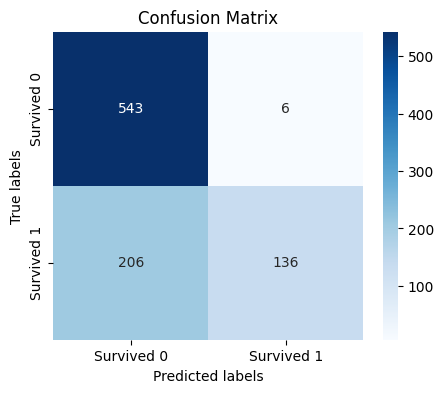

Precision: 0.9577464788732394


In [129]:
# Calculate metrics for the basic model
print('BASIC MODEL METRICS:')
calculate_metrics(x_val, y_val, basic_model)

### 4.7.2 Dense Model Metrics

DENSE MODEL METRICS:
28/28 [==============================] - 0s 3ms/step
ROC AUC: 0.9343756324630642
Confusion Matrix:


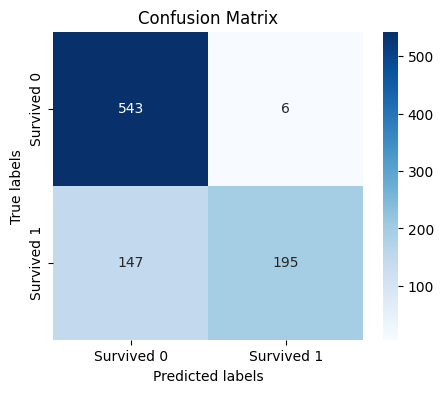

Precision: 0.9701492537313433


In [130]:
print('DENSE MODEL METRICS:')
calculate_metrics(x_val, y_val, dense_model)

### 4.7.3 Norm Model Metrics

NORM MODEL METRICS:
28/28 [==============================] - 0s 3ms/step
ROC AUC: 0.9040493614120303
Confusion Matrix:


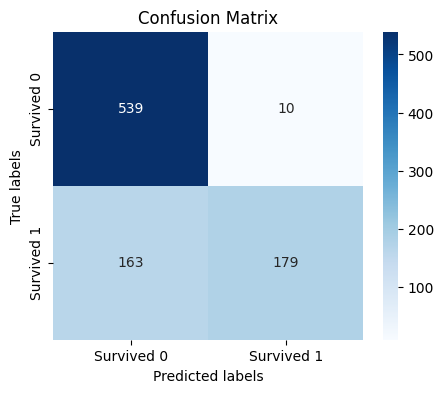

Precision: 0.9470899470899471


In [131]:
print('NORM MODEL METRICS:')
calculate_metrics(x_val, y_val, norm_model)

# 5. Conclusion
Comparing the metrics of the three models we can clearly see that the **'Dense Model'** is the best one:

1.   The Loss is lower than the basic model and norm model
2.   The Accuracy is higher than the basic model and norm model
3.   The ROC AUC score is higher than the basic model and norm model
4.   The Precision score is higher than the basic model and norm model
5.   The Confusion Matrix shows that we have 147 + 6 wrong predictions, which is lower than the other matrices (for the basic 206+6, for the norm 163+10)   

